## Loading Dataset ##

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
breast_cancer  = load_breast_cancer()
df = pd.DataFrame(data = breast_cancer['data'], columns = breast_cancer['feature_names'])

## Dataset ##

In [86]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Training the model ##

In [3]:
from sklearn.model_selection import train_test_split
x = df.copy()
y = breast_cancer['target']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2) 

In [71]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3,  random_state=42)
model = model.fit(x_train, y_train)

In [72]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [73]:
predict = model.predict(x_test)
predict

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1])

In [74]:
prediction = model.predict_proba(x_test)
prediction

array([[0.01162791, 0.98837209],
       [0.01162791, 0.98837209],
       [0.01162791, 0.98837209],
       [0.01162791, 0.98837209],
       [0.01162791, 0.98837209],
       [0.01162791, 0.98837209],
       [1.        , 0.        ],
       [0.01162791, 0.98837209],
       [0.01162791, 0.98837209],
       [1.        , 0.        ],
       [0.01162791, 0.98837209],
       [1.        , 0.        ],
       [0.01162791, 0.98837209],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.01162791, 0.98837209],
       [1.        , 0.        ],
       [0.01162791, 0.98837209],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.01162791, 0.98837209],
       [1.        , 0.        ],
       [0.01162791, 0.98837209],
       [1.        , 0.        ],
       [0.26923077, 0.73076923],
       [0.01162791, 0.98837209],
       [0.01162791, 0.98837209],
       [0.01162791, 0.98837209],
       [0.01162791, 0.98837209],
       [0.01162791, 0.98837209],
       [1.

## Testing ##

In [88]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predict)
print(f"Accuracy Score: {acc * 100:.2f}%")

Accuracy Score: 92.98%


In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict)

array([[33,  6],
       [ 2, 73]])

In [89]:
from sklearn.metrics import precision_score
prec = precision_score(y_test, predict, average='macro')
print(f"Precision Score: {prec * 100:.2f}%")


Precision Score: 93.35%


In [78]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print(recall_score(y_test, predict, average='macro'))
print(f1_score(y_test, predict, average='macro'))

0.9097435897435897
0.91997191997192


In [79]:
feature= breast_cancer['feature_names']
feature_importance = pd.DataFrame(model.feature_importances_,index = feature).sort_values(0,ascending=False)
feature_importance.head(10)

,0
worst perimeter,0.699653
worst concave points,0.142463
mean texture,0.054475
worst radius,0.048127
mean concavity,0.039515
worst texture,0.015767
mean compactness,0.000000
mean concave points,0.000000
mean symmetry,0.000000
mean fractal dimension,0.000000


In [80]:
print(metrics.classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        39
           1       0.92      0.97      0.95        75

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



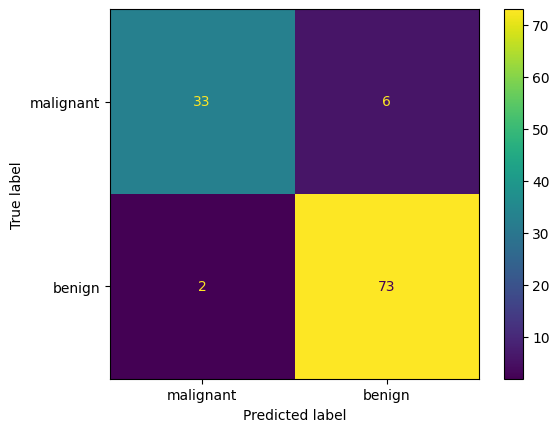

In [81]:
cm = metrics.confusion_matrix(y_test,predict)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels = breast_cancer.target_names)
disp.plot()

In [82]:
from sklearn import tree

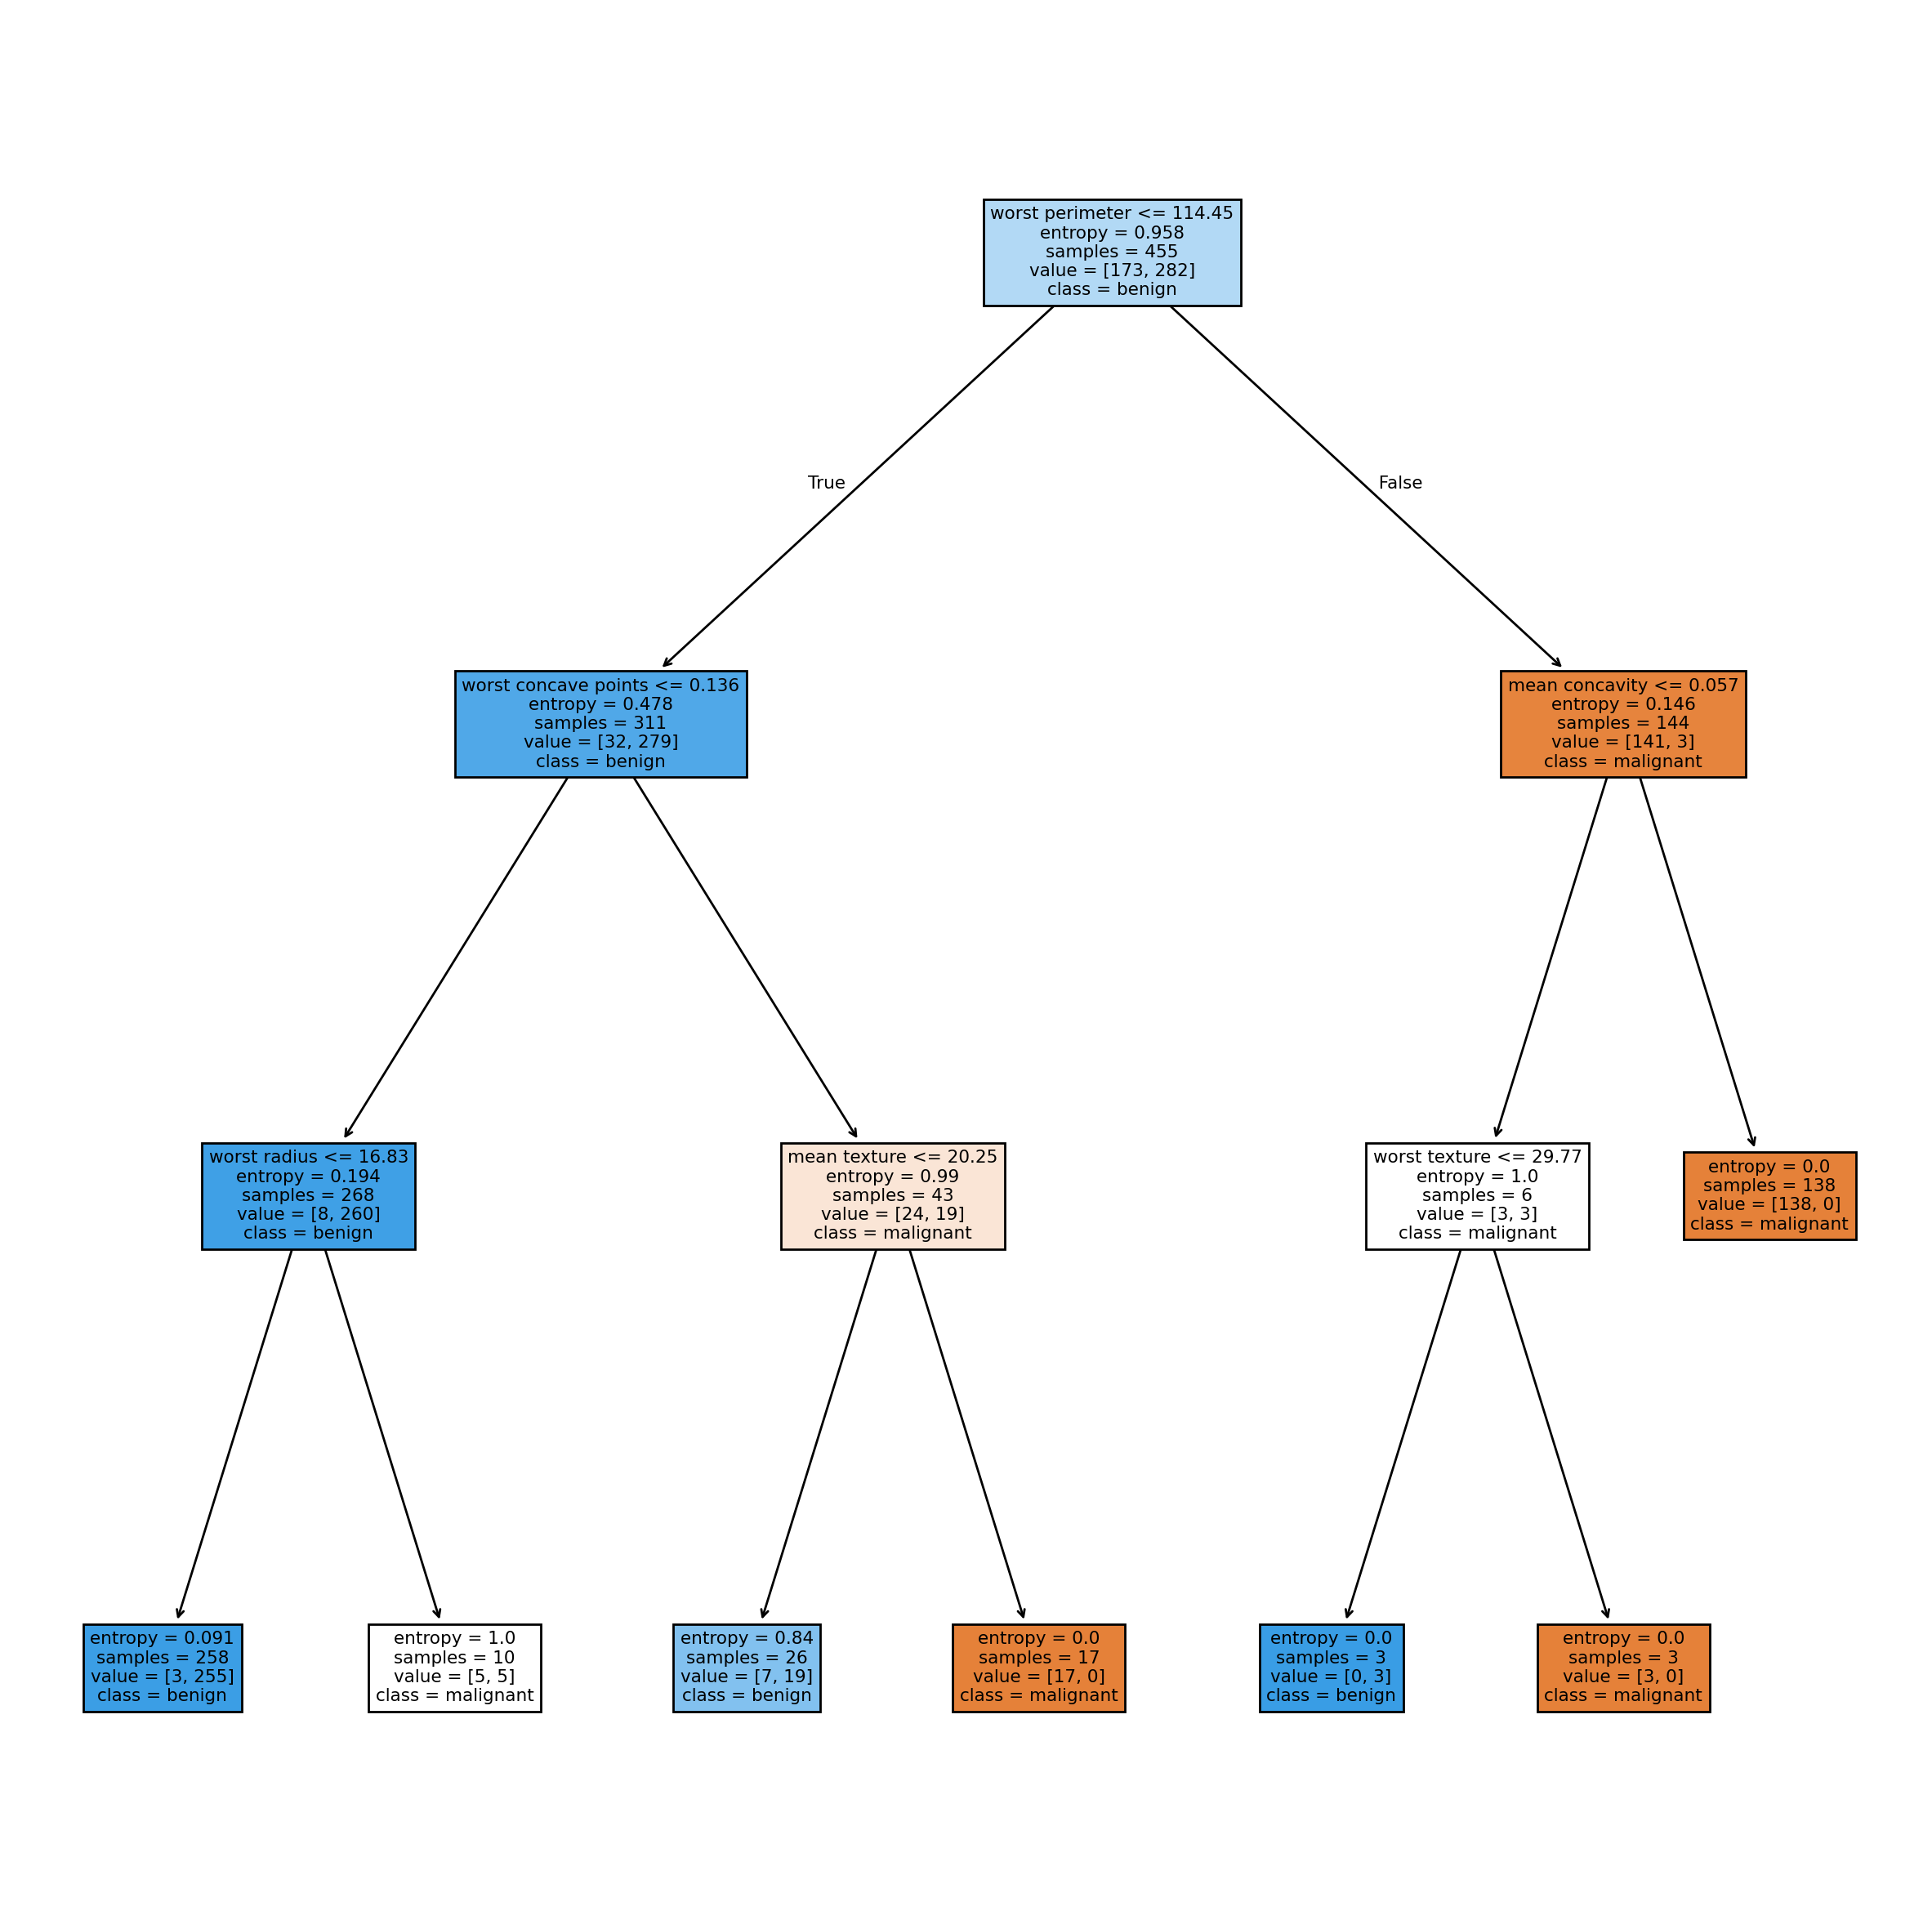

In [83]:
plt.figure(figsize = (15,15), dpi = 200)
ax = tree.plot_tree(model, feature_names = breast_cancer.feature_names, class_names = breast_cancer.target_names, filled= True)